# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> Замечание по всему разделу ответов на вопросы
    
Гораздо рациональнее здесь воспользоваться `pivot_table()` и выводить результаты в одной таблице.
    
Чтобы найти долю должников, нужно количество должников поделить на общее число заемщиков. Эту долю можно найти с помощью функции агрегации `mean`
    
Попробуй получить сводную следующего вида. В индексе столбец, который исследуем (в первом вопросе это количество детей), а столбцы: 'Всего кредитополучателей', 'Всего должников', 'Доля должников'. Учитывай, что использовать параметр columns не обязательно, а в параметр aggfunc можно указывать несколько функций агрегации сразу.

Также могу посоветовать переименовать столбцы и написать функцию для построения сводных во всех вопросах.
</div>

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.

#Выведем заголовки таблицы для удобной работы
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> 
    
Все библиотеки нужно импортировать в одной ячейке в начале всего кода, это соответствует стилистическому гайду <a href="https://peps.python.org/pep-0008/">pep 8</a>
</div>

<AxesSubplot:xlabel='debt', ylabel='count'>

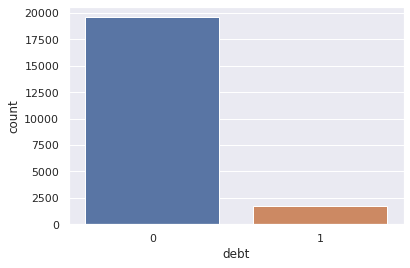

In [23]:
#Зададим визуальный стиль таблиц
sns.set_theme(style ="darkgrid")

#Посмотрим как распределены задолжности по кредитам среди всех клиентов
sns.countplot(x ="debt", data =data)

In [24]:
# Выведем информацию в процентах
debt_is_true = data[data['debt'] == 1].count() / data['debt'].count()
debt_is_false = data[data['debt'] == 0].count() / data['debt'].count()

print(f'''
Имеющие задолжность {debt_is_true['debt']:.1%}
Не имеющие задолжность {debt_is_false['debt']:.1%}''')



Имеющие задолжность 8.1%
Не имеющие задолжность 91.9%


In [25]:
#Две контрольные группы клиентов имеющие задолжности и не имеющие их
debt_on = data[data['debt'] == 1]
debt_off = data[data['debt'] == 0]

<AxesSubplot:xlabel='children', ylabel='count'>

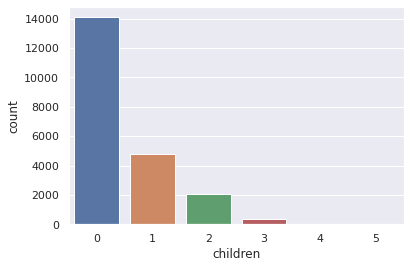

In [26]:
#Посмотрим распределение наличия детей среди клиентов
sns.countplot(x ="children", data =data)

In [27]:
# Выведем информацию в процентах
for child in range(6):
    children_count_percent = data[data['children'] == child]['children'].count() / data['children'].count()
    print(f'Среди всех клиентов у {children_count_percent:.2%} клиентов {child} детей.')

Среди всех клиентов у 66.06% клиентов 0 детей.
Среди всех клиентов у 22.54% клиентов 1 детей.
Среди всех клиентов у 9.62% клиентов 2 детей.
Среди всех клиентов у 1.55% клиентов 3 детей.
Среди всех клиентов у 0.19% клиентов 4 детей.
Среди всех клиентов у 0.04% клиентов 5 детей.


<AxesSubplot:xlabel='children', ylabel='count'>

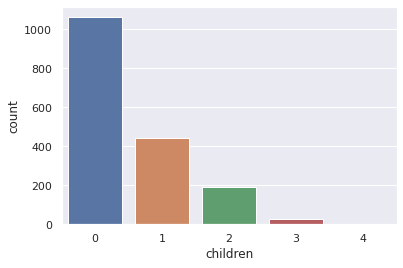

In [28]:
#Наличие детей у клиентов имеющие задолжности
sns.countplot(x = debt_on['children'], data = data)

In [29]:
# Выведем информацию в процентах
for child in range(5):
    children_count_percent = debt_on[debt_on['children'] == child]['children'].count() / debt_on['children'].count()
    print(f'Среди клиентов имеющих задолжности у {children_count_percent:.1%} клиентов {child} детей.')

Среди клиентов имеющих задолжности у 61.4% клиентов 0 детей.
Среди клиентов имеющих задолжности у 25.6% клиентов 1 детей.
Среди клиентов имеющих задолжности у 11.2% клиентов 2 детей.
Среди клиентов имеющих задолжности у 1.6% клиентов 3 детей.
Среди клиентов имеющих задолжности у 0.2% клиентов 4 детей.


<AxesSubplot:xlabel='children', ylabel='count'>

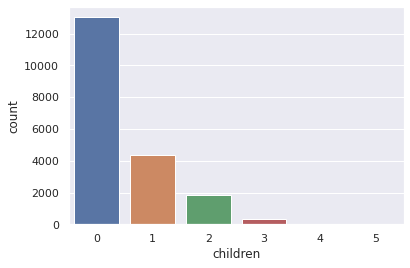

In [30]:
#Наличие детей у клиентов не имеющие задолжности
sns.countplot(x = debt_off['children'], data = data)

In [31]:
# Выведем информацию в процентах
for child in range(6):
    children_count_percent = debt_off[debt_off['children'] == child]['children'].count() / debt_off['children'].count()
    print(f'Среди клиентов не имеющих задолжности у {children_count_percent:.2%} клиентов {child} детей.')

Среди клиентов не имеющих задолжности у 66.47% клиентов 0 детей.
Среди клиентов не имеющих задолжности у 22.27% клиентов 1 детей.
Среди клиентов не имеющих задолжности у 9.48% клиентов 2 детей.
Среди клиентов не имеющих задолжности у 1.55% клиентов 3 детей.
Среди клиентов не имеющих задолжности у 0.19% клиентов 4 детей.
Среди клиентов не имеющих задолжности у 0.05% клиентов 5 детей.


### Доработки и исправления ниже

Комментарий ревьюера №1 Замечание по всему разделу ответов на вопросы
Гораздо рациональнее здесь воспользоваться pivot_table() и выводить результаты в одной таблице.

Чтобы найти долю должников, нужно количество должников поделить на общее число заемщиков. Эту долю можно найти с помощью функции агрегации mean

Попробуй получить сводную следующего вида. В индексе столбец, который исследуем (в первом вопросе это количество детей), а столбцы: 'Всего кредитополучателей', 'Всего должников', 'Доля должников'. Учитывай, что использовать параметр columns не обязательно, а в параметр aggfunc можно указывать несколько функций агрегации сразу.

Также могу посоветовать переименовать столбцы и написать функцию для построения сводных во всех вопросах.

In [32]:
#функция для вывода сводной таблицы по должникам для разных категорий
def final_table(df, index):
    new_df = df.pivot_table(index=index, values='debt', aggfunc = ['count','sum','mean'])
    new_df.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников']
    display(new_df)

In [33]:
#сводная таблица по должникам для количества детей
final_table(data, 'children')

,Всего кредитополучателей,Всего должников,Доля должников
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


<div class="alert alert-warning">
<b>Комментарий ревьюера №2</b> 
    
Долю людей с определенным количеством детей от всех людей можно было находить в той же сводной так

    new_df['Всего кредитополучателей']/new_df['Всего кредитополучателей'].sum()
</div>

**Вывод:** 
- У большей части клиентов детей нет, таких клиентов около 2/3, у клиентов имеющих детей как правило один ребенок, реже 2
- Наличие детей повышает риск невыплаты кредита в срок.

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> 
    
Хороший вывод
</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

<AxesSubplot:xlabel='count', ylabel='family_status'>

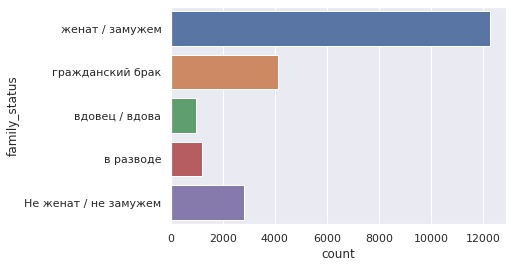

In [34]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
#Проверим распределение семейного положения среди всех клиентов
sns.countplot(y ="family_status", data =data)

In [35]:
#Найдем все категории семейного статуса
unicue_family_status = data['family_status'].unique()

In [36]:
# Выведем информацию в процентах
for status in unicue_family_status:
    family_status_count_percent = data[data['family_status'] == status ]['family_status'].count() / data['family_status'].count()
    print(f'Среди всех клиентов у {family_status_count_percent:.2%}  семейный статус - {status}.')

Среди всех клиентов у 57.48%  семейный статус - женат / замужем.
Среди всех клиентов у 19.38%  семейный статус - гражданский брак.
Среди всех клиентов у 4.46%  семейный статус - вдовец / вдова.
Среди всех клиентов у 5.57%  семейный статус - в разводе.
Среди всех клиентов у 13.11%  семейный статус - Не женат / не замужем.


<AxesSubplot:xlabel='count', ylabel='family_status'>

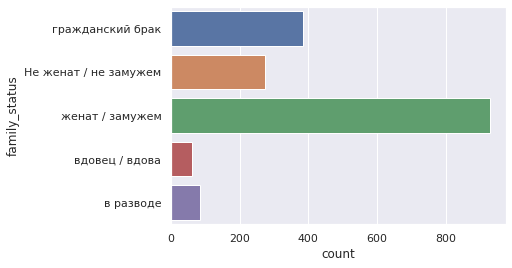

In [37]:
#Семейное положение у клиентов имеющих задолжности в прошлом
sns.countplot(y = debt_on['family_status'], data = data)

In [38]:
# Выведем информацию в процентах
for status in unicue_family_status:
    family_status_count_percent = debt_on[debt_on['family_status'] == status ]['family_status'].count() / debt_on['family_status'].count()
    print(f'Среди клиентов имеющих задолжности в прошлом у {family_status_count_percent:.2%}  семейны статус - {status}.')

Среди клиентов имеющих задолжности в прошлом у 53.52%  семейны статус - женат / замужем.
Среди клиентов имеющих задолжности в прошлом у 22.23%  семейны статус - гражданский брак.
Среди клиентов имеющих задолжности в прошлом у 3.64%  семейны статус - вдовец / вдова.
Среди клиентов имеющих задолжности в прошлом у 4.85%  семейны статус - в разводе.
Среди клиентов имеющих задолжности в прошлом у 15.76%  семейны статус - Не женат / не замужем.


<AxesSubplot:xlabel='count', ylabel='family_status'>

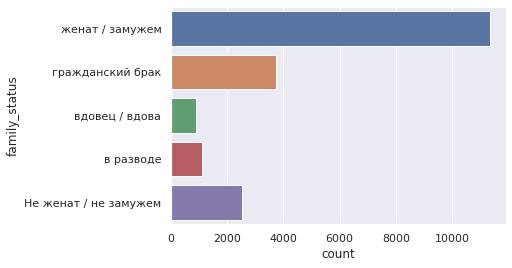

In [39]:
#Семейное положение у клиентов не имеющих задолжности в прошлом
sns.countplot(y = debt_off['family_status'], data = data)

In [40]:
# Выведем информацию в процентах
for status in unicue_family_status:
    family_status_count_percent = debt_off[debt_off['family_status'] == status ]['family_status'].count() / debt_off['family_status'].count()
    print(f'Среди  клиентов не имеющих задолжности в прошлом у {family_status_count_percent:.2%}  семейный статус - {status}.')

Среди  клиентов не имеющих задолжности в прошлом у 57.83%  семейный статус - женат / замужем.
Среди  клиентов не имеющих задолжности в прошлом у 19.13%  семейный статус - гражданский брак.
Среди  клиентов не имеющих задолжности в прошлом у 4.53%  семейный статус - вдовец / вдова.
Среди  клиентов не имеющих задолжности в прошлом у 5.64%  семейный статус - в разводе.
Среди  клиентов не имеющих задолжности в прошлом у 12.87%  семейный статус - Не женат / не замужем.


In [41]:
#сводная таблица по должникам среди семейного статуса
final_table(data, 'family_status')

,Всего кредитополучателей,Всего должников,Доля должников
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


**Вывод:** 
- Больше половины клиентов имеют статус женат/замужем
- Больше риска в невыплату кредита в срок вносят статусы "Не женат / не замужем" и "гражданский брак".

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> 
    
Хорошо
</div>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

<AxesSubplot:xlabel='total_income_category', ylabel='count'>

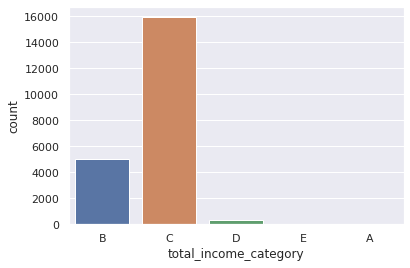

In [42]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
#Распределение всех клиентов по категориям доходов
sns.countplot(x ="total_income_category", data =data)

In [43]:
# Выведем информацию в процентах
for category in 'ABCDE':
    total_income_category_count_percent = data[data['total_income_category'] == category ]['total_income_category'].count() / data['total_income_category'].count()
    print(f'Среди всех клиентов у {total_income_category_count_percent:.2%} - {category} категория доходов.')

Среди всех клиентов у 0.12% - A категория доходов.
Среди всех клиентов у 23.51% - B категория доходов.
Среди всех клиентов у 74.64% - C категория доходов.
Среди всех клиентов у 1.64% - D категория доходов.
Среди всех клиентов у 0.10% - E категория доходов.


<AxesSubplot:xlabel='total_income', ylabel='Count'>

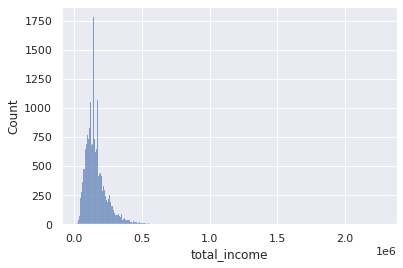

In [44]:
#Распределение всех клиентов по сумме доходов
sns.histplot(
    data,
    x="total_income")

In [45]:
#Выделим некоторые характеристики выборки по доходам
total_income_mean = data['total_income'].median()
total_income_max = data['total_income'].max()
print(f'''Медианная заработная плата среди всех клиентов {total_income_mean:.0f}
Максимальная заработная плата среди всех клиентов {total_income_max:.0f}''')

Медианная заработная плата среди всех клиентов 142594
Максимальная заработная плата среди всех клиентов 2265604


<AxesSubplot:xlabel='total_income_category', ylabel='count'>

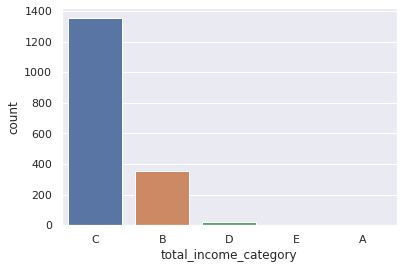

In [46]:
#Распределение клиентов имеющих задолжности по категориям доходов
sns.countplot(x = debt_on['total_income_category'], data = data)

In [47]:
# Выведем информацию в процентах
for category in 'ABCDE':
    total_income_category_count_percent = debt_on[debt_on['total_income_category'] == category ]['total_income_category'].count() / debt_on['total_income_category'].count()
    print(f'Среди клиентов имеющих задолжности у {total_income_category_count_percent:.2%} - {category} категория доходов.')

Среди клиентов имеющих задолжности у 0.12% - A категория доходов.
Среди клиентов имеющих задолжности у 20.44% - B категория доходов.
Среди клиентов имеющих задолжности у 78.12% - C категория доходов.
Среди клиентов имеющих задолжности у 1.21% - D категория доходов.
Среди клиентов имеющих задолжности у 0.12% - E категория доходов.


<AxesSubplot:xlabel='total_income_category', ylabel='count'>

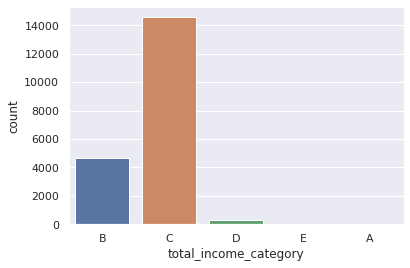

In [48]:
#Распределение клиентов не имеющих задолжности по категориям доходов
sns.countplot(x = debt_off['total_income_category'], data = data)

In [49]:
# Выведем информацию в процентах
for category in 'ABCDE':
    total_income_category_count_percent = debt_off[debt_off['total_income_category'] == category ]['total_income_category'].count() / debt_off['total_income_category'].count()
    print(f'Среди клиентов не имеющих задолжности у {total_income_category_count_percent:.2%} - {category} категория доходов.')

Среди клиентов не имеющих задолжности у 0.12% - A категория доходов.
Среди клиентов не имеющих задолжности у 23.78% - B категория доходов.
Среди клиентов не имеющих задолжности у 74.33% - C категория доходов.
Среди клиентов не имеющих задолжности у 1.67% - D категория доходов.
Среди клиентов не имеющих задолжности у 0.10% - E категория доходов.


In [50]:
#сводная таблица по доджникам среди категорий доходов
final_table(data, 'total_income_category')

,Всего кредитополучателей,Всего должников,Доля должников
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


**Вывод:** 
- 3/4 категорий доходности клиентов приходится на доходность класса С которая включает диапазон
- Так же категория доходов С  повышает риск не выплаты кредитов в срок, более благонадежной оказадась категория B в которую попадают клиенты с доходом от 50001 до 200000.

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> 
    
👍
</div>

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

<AxesSubplot:xlabel='count', ylabel='purpose_category'>

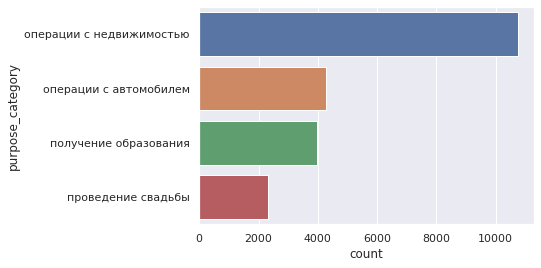

In [51]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
#Распределение целей кредита среди всех клиентов
sns.countplot(y ="purpose_category", data =data)

In [52]:
# Блок со всеми целями взятия кредита
unicue_purpose_category = data['purpose_category'].unique()

In [53]:
# Выведем информацию в процентах
for category in unicue_purpose_category:
    purpose_category_count_percent = data[data['purpose_category'] == category ]['purpose_category'].count() / data['purpose_category'].count()
    print(f'Среди всех клиентов {purpose_category_count_percent:.2%}  берут кредит для категории: {category}.')

Среди всех клиентов 50.40%  берут кредит для категории: операции с недвижимостью.
Среди всех клиентов 20.06%  берут кредит для категории: операции с автомобилем.
Среди всех клиентов 18.70%  берут кредит для категории: получение образования.
Среди всех клиентов 10.84%  берут кредит для категории: проведение свадьбы.


<AxesSubplot:xlabel='count', ylabel='purpose_category'>

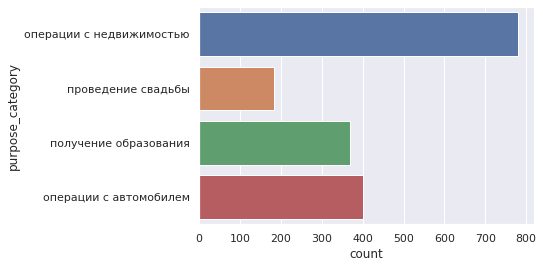

In [54]:
#Распределение целей кредита среди  клиентов имеющих задолжности
sns.countplot(y=debt_on['purpose_category'], data=data)

In [55]:
# Выведем информацию в процентах
for category in unicue_purpose_category:
    purpose_category_count_percent = debt_on[debt_on['purpose_category'] == category ]['purpose_category'].count() / debt_on['purpose_category'].count()
    print(f'Среди клиентов имеющих задолжности {purpose_category_count_percent:.2%}  берут кредит для категории: {category}.')

Среди клиентов имеющих задолжности 45.03%  берут кредит для категории: операции с недвижимостью.
Среди клиентов имеющих задолжности 23.09%  берут кредит для категории: операции с автомобилем.
Среди клиентов имеющих задолжности 21.30%  берут кредит для категории: получение образования.
Среди клиентов имеющих задолжности 10.57%  берут кредит для категории: проведение свадьбы.


<AxesSubplot:xlabel='count', ylabel='purpose_category'>

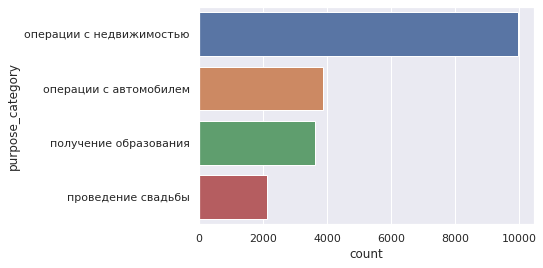

In [56]:
#Распределение целей кредита среди  клиентов не имеющих задолжности
sns.countplot(y=debt_off['purpose_category'], data=data)

In [57]:
# Выведем информацию в процентах
for category in unicue_purpose_category:
    purpose_category_count_percent = debt_off[debt_off['purpose_category'] == category ]['purpose_category'].count() / debt_off['purpose_category'].count()
    print(f'Среди клиентов не имеющих задолжности {purpose_category_count_percent:.2%}  берут кредит для категории: {category}.')

Среди клиентов не имеющих задолжности 50.88%  берут кредит для категории: операции с недвижимостью.
Среди клиентов не имеющих задолжности 19.79%  берут кредит для категории: операции с автомобилем.
Среди клиентов не имеющих задолжности 18.47%  берут кредит для категории: получение образования.
Среди клиентов не имеющих задолжности 10.87%  берут кредит для категории: проведение свадьбы.


In [58]:
#сводная таблица по дожникам среди категорий целей заема
final_table(data, 'purpose_category')

,Всего кредитополучателей,Всего должников,Доля должников
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


**Вывод:** 
- Почти половина клиентов берет кредит для операций с недвижимостью
- Если клиент берет кредит для операций с автомобилем, то повышается риск невозврата кредита в срок.

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> 
    
Верно
</div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
- Не все клиенты получают "белую" зарплату, они могут получать ее на руки, такая зарплата не отражается в налогах, а стаж не отражается в трудовой книжке, поэтому стаж работы и доходы могут отсутствовать
- Клиент может быть временно безработным, например студенты, пенсионеры или женщины в декрете 
- Могли произойти ошибки при выгрузке данных

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Хорошие предположения
</div>

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* При рассчетах количественных данных максимальные и минимальные значения могут сильно исказать представление о выборке, для показаний средних значений в таких случаях лучше брать медианные значения, они будут делить выборку примерно поровнуу, проходя ровно посередине всех отсортированных значений, либо же можно взять усеченную выборку, в которой удалены несколько процентов с каждого края, таким образом можно избавиться от выбросов и тогда среднеарефметическое будет более коректно представлять среднее значение.

<AxesSubplot:xlabel='total_income'>

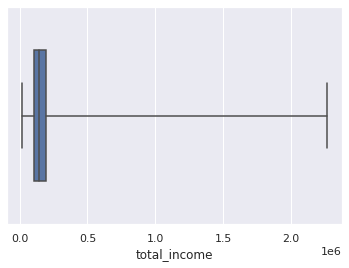

In [59]:
# Ящик с усами для распределения доходов, единичные выбросы миллионеров сильно искажают доходы "работяг"
sns.boxplot(x="total_income",  data=data,
            whis=[0, 100], width=.6,)

In [60]:
total_income_max = data['total_income'].max()
total_income_min = data['total_income'].min()
total_inclome_mean = data['total_income'].mean()
total_income_median = data['total_income'].median()

print(f'''
Максимальное значение: {total_income_max}
Минимальное значение: {total_income_min}
Среднее значение: {total_inclome_mean}
Медиана: {total_income_median}''')


Максимальное значение: 2265604
Минимальное значение: 20667
Среднее значение: 165342.74576906848
Медиана: 142594.0


<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Да, смотрим на наличие выбросов👍
</div>

### Шаг 4: общий вывод.

Напишите ваш общий вывод. 

Данные выборок клиентов имевших и не имевших задолжности в прошлом довольно схожи, но есть некоторые закономерности.
Кредит вовремя не выплачивают 8,1% клиентов, самые сильные факторы влияющие на не выплату кредита в срок являются:

- Наличие детей: наличие ребенка
- Семейный статус: "Не женат / не замужем" и "гражданский брак"
- Зависимость от доходов: доходная категория С с доходами от 50001 до 200000
- Цель кредита: операции с автомобилем  и образование.

Рекомендации по описанию "идеального" клиента:
- Наличие детей: без детей
- Семейный статус: в разводе или вдовец/вдова
- Зависимость от доходов: категории B и D
- Цель кредита: свадьба и операции с недвижимостью

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> 
    
Можно описать портрет "идеального" клиента и добавить рекомендации банку-заказчику
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
    
В целом, работа хорошая. У тебя отличные аналитические навыки, но остались небольшие доработки. Доделывай и присылай на повторную проверку.
        
Жду твоих исправлений 😊
</font></b>
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
Отлично! Критических замечаний больше нет. Проект принят! 👏 Поздравляю и желаю удачи!
</font></b>
</div>